In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Standard Scalar normalizes the data
from sklearn.metrics import silhouette_score

In [3]:
# Load the dataset
data = pd.read_csv('csv/environmental factors.csv')
data.head()

,temperature,humidity,wind_speed,carbon_emissions,solar_irradiance,pollution_level
0,22.490802,52.418449,19.599966,337.165056,369.020837,84.723658
1,34.014286,49.974726,8.690240,256.681604,185.335998,49.451704
2,29.639879,40.569235,11.932794,484.024336,213.723302,19.546561
3,26.973170,66.436000,18.265613,148.540303,262.604015,73.664179
4,18.120373,58.597450,14.641787,314.535387,283.288001,41.867814


In [4]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


# Display scaled data
pd.DataFrame(data_scaled, columns=data.columns).head()

,temperature,humidity,wind_speed,carbon_emissions,solar_irradiance,pollution_level
0,-0.415900,-0.452465,0.801884,0.482494,-0.684316,1.193409
1,1.587377,-0.593258,-1.100359,-0.136414,-1.389866,-0.029923
2,0.826917,-1.135149,-0.534981,1.611824,-1.280827,-1.067119
3,0.363328,0.355146,0.569224,-0.968007,-1.093072,0.809835
4,-1.175669,-0.096466,-0.062635,0.308475,-1.013623,-0.292954


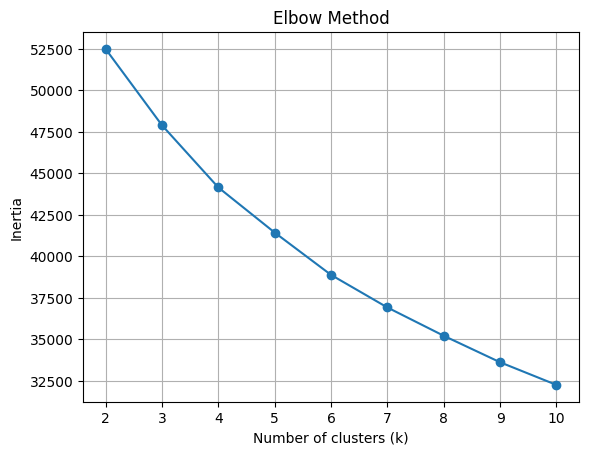

In [12]:
# Use the Elbow method to find the optimal number of clusters
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the inertia values to find the "elbow"
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [6]:
# Applying K-Means clustering with k=6 (as an example)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
data['cluster'] = kmeans.fit_predict(data_scaled)

# Display the first few rows with cluster labels
data.head()

,temperature,humidity,wind_speed,carbon_emissions,solar_irradiance,pollution_level,cluster
0,22.490802,52.418449,19.599966,337.165056,369.020837,84.723658,4
1,34.014286,49.974726,8.690240,256.681604,185.335998,49.451704,3
2,29.639879,40.569235,11.932794,484.024336,213.723302,19.546561,3
3,26.973170,66.436000,18.265613,148.540303,262.604015,73.664179,4
4,18.120373,58.597450,14.641787,314.535387,283.288001,41.867814,4


In [ ]:
# Calculate Silhouette Score
sil_score = silhouette_score(data_scaled, data['cluster'])
print(f'Silhouette Score: {sil_score}')

# 1 - well
# 0 - overlaped
# -1 - poor

Silhouette Score: 0.11726147152391143


'\n1 - well\n0 - overlaped\n-1 - poor\n'

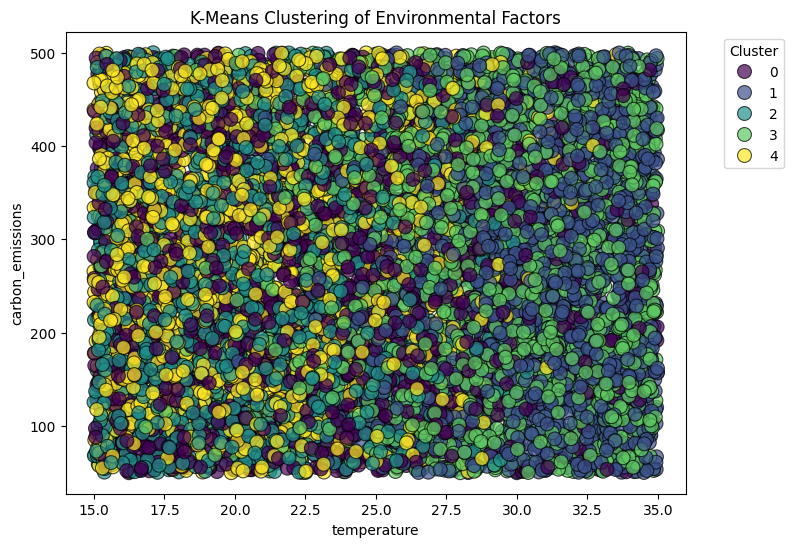

In [9]:
# Create a scatter plot with the cluster labels
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperature', y='carbon_emissions', hue='cluster', 
                data=data, palette='viridis', s=100, alpha=0.7, edgecolor='k')

plt.title('K-Means Clustering of Environmental Factors')
plt.xlabel('temperature')
plt.ylabel('carbon_emissions')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()